In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd

In [14]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [52]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, Column, Integer, String

In [53]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [54]:
# reflect an existing database into a new model
# reflect the tables
inspector = inspect(engine)
inspector.get_table_names()

['hawaii_measurements', 'hawaii_stations', 'measurement', 'station']

In [55]:
# We can view all of the classes that automap found
Base = automap_base()

In [19]:
# Save references to each table
class Measure(Base):
    __tablename__ = 'measurement'
    station = Column(String, primary_key=True)
    date = Column(String(255))
    prcp = Column(Integer)
    tobs = Column(Integer)

class stations(Base):
    __tablename__ = 'station'
    station = Column(String, primary_key=True)
    name = Column(String(255))
    latitude = Column(Integer)
    longitude = Column(String(255))
    elevation = Column(Integer)

In [20]:
Base.prepare(engine, reflect=True)
Base.metadata.create_all(engine)

In [21]:
# Create our session (link) from Python to the DB
conn = engine.connect()
session = Session(bind=engine)

# Exploratory Climate Analysis

            date  prcp
0     2016-08-24  0.08
1     2016-08-25  0.08
2     2016-08-26  0.00
3     2016-08-27  0.00
4     2016-08-28  0.01
...          ...   ...
2218  2017-08-19  0.09
2219  2017-08-20   NaN
2220  2017-08-21  0.56
2221  2017-08-22  0.50
2222  2017-08-23  0.45

[2223 rows x 2 columns]


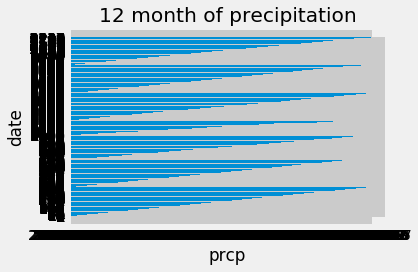

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


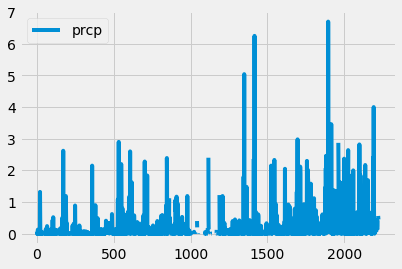

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
dandp = session.query(Measure.date, Measure.prcp).\
     filter(Measure.date>"2016-08-23").all()

# # Calculate the date 1 year ago from the last data point in the database
Last_day= engine.execute ("SELECT MAX(date) FROM measurement") 
print (Last_day)
# # # Perform a query to retrieve the data and precipitation scores
date_prcp= engine.execute ("SELECT date, prcp FROM measurement")
print (date_prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(dandp, columns=['date', 'prcp'])
# Sort the dataframe by date
print (df)

#Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ypos = range(1, len(df)+1)
ax.barh(ypos, df["date"])
ax.set_xlabel("prcp")
ax.set_ylabel("date")
ax.set_yticks(ypos)
ax.set_title("12 month of precipitation")
fig.tight_layout()
plt.show()

df.plot()

# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

In [35]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(stations).count()
print (station_count)

9


In [60]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_stations,= engine.execute ("SELECT DISTINCT station FROM station").first() 
print (active_stations)
# List the stations and the counts in descending order.
station_active =engine.execute ("SELECT * FROM station ORDER BY station").first()
print (station_active)

    

USC00519397
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)


In [49]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
MaxP,= engine.execute ("SELECT MAX(prcp) FROM measurement").first() 
print (MaxP)
MinP,= engine.execute ("SELECT MIN(prcp) FROM measurement").first() 
print (MinP)

11.53
0.0


In [65]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
High_station,= engine.execute ("SELECT station FROM measurement where 11.53").first()
print (High_station)
High_station,= engine.execute ("SELECT * FROM measurement where USC00519397 and").first()


USC00519397


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
